In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
dframe_correct_guess = pd.read_csv("/data/processed/valid_guesses.csv")

dframe_correct_solutions = pd.read_csv("data/processed/valid_solutions.csv")

dframe_answers_text = pd.read_csv("data/proceed/wordle.txt", header=None)

dframe_answers = pd.DataFrame(dframe_answers_text)


In [13]:
print("Total No.Of Correct Wordle Guesses:", len(dframe_correct_guess), "\nTotal No.Of Correct Wordle Solutions:",len(dframe_correct_solutions), "\nNo.Of Past Wordle Solutions:",len(dframe_answers))

Total No.Of Correct Wordle Guesses: 10657 
Total No.Of Correct Wordle Solutions: 2315 
No.Of Past Wordle Solutions: 247


In [14]:
df_vg = dframe_correct_guess['word'].str.split('',n=5,expand=True)
del(df_vg[0])
df_vs = dframe_correct_solutions['word'].str.split('',n=5,expand=True)
del(df_vs[0])
df_pw = dframe_answers[0].str.split('',n=5,expand=True)
del(df_pw[0])


In [15]:
dframe_vg_number = df_vg.apply(pd.Series.value_counts)

dframe_vg_number[6] = dframe_vg_number.sum(1)
dframe_vg_number = dframe_vg_number.fillna(0)

dframe_vs_number = df_vs.apply(pd.Series.value_counts)
dframe_vs_number[6] = dframe_vs_number.sum(1)
dframe_vs_number = dframe_vs_number.fillna(0)

dframe_pw_number = df_pw.apply(pd.Series.value_counts)
dframe_pw_number[6] = dframe_pw_number.sum(1)
dframe_pw_number = dframe_pw_number.fillna(0)

dframe_vg_number



,1,2,3,4,5,6
a,596,1959,929,911,616,5011
b,736,65,278,219,48,1346
c,724,136,336,259,96,1551
d,574,64,315,402,705,2060
e,231,1386,705,2009,1098,5429
f,462,16,153,198,56,885
g,523,64,297,347,102,1333
h,420,402,111,207,231,1371
i,131,1181,785,722,269,3088
j,182,9,43,27,3,264


In [16]:
dframe_vg_frequency = dframe_vg_number
dframe_vs_frequency = dframe_vs_number
dframe_pw_frequency = dframe_pw_number

def calcFrac(df_freq, df_count):    
    for i in range(1, 7):
        df_freq[i] = df_count[i]/sum(df_count[i])*100
    df_freq.reset_index(inplace=True)
    df_freq['index'] = df_freq['index'].str.upper()
calcFrac(dframe_vg_frequency, dframe_vg_number)
calcFrac(dframe_vs_frequency, dframe_vs_number)
calcFrac(dframe_pw_frequency, dframe_pw_number)

dframe_vs_frequency


,index,1,2,3,4,5,6
0,A,6.090713,13.131749,13.261339,7.041037,2.764579,8.457883
1,B,7.473002,0.691145,2.462203,1.036717,0.475162,2.427646
2,C,8.552916,1.727862,2.419006,6.565875,1.339093,4.120950
3,D,4.794816,0.863931,3.239741,2.980562,5.097192,3.395248
4,E,3.110151,10.453564,7.645788,13.736501,18.315335,10.652268
5,F,5.874730,0.345572,1.079914,1.511879,1.123110,1.987041
6,G,4.967603,0.518359,2.894168,3.282937,1.771058,2.686825
7,H,2.980562,6.220302,0.388769,1.209503,6.004320,3.360691
8,I,1.468683,8.725702,11.490281,6.825054,0.475162,5.796976
9,J,0.863931,0.086393,0.129590,0.086393,0.000000,0.233261


#### Importing the dataset and view it. Each word is split up into 5 different columns so each column is a slot in a 5 letter word.

def countUnique(dfUnique):
    return pd.DataFrame(zip(*np.unique(dfUnique.to_numpy().flatten(),return_counts=True)), columns = ['letter', 'count'])

df_vg_unique = countUnique(df_vg)
df_vs_unique = countUnique(df_vs)
df_pw_unique = countUnique(df_pw)

df_vg_slots = {}
df_vs_slots = {}
df_pw_slots = {}

for i in range(1, 6):
    df_vg_slots['slot%s'%i] = countUnique(df_vg[[i]])
    df_vs_slots['slot%s'%i] = countUnique(df_vs[[i]])
    df_pw_slots['slot%s'%i] = countUnique(df_pw[[i]])

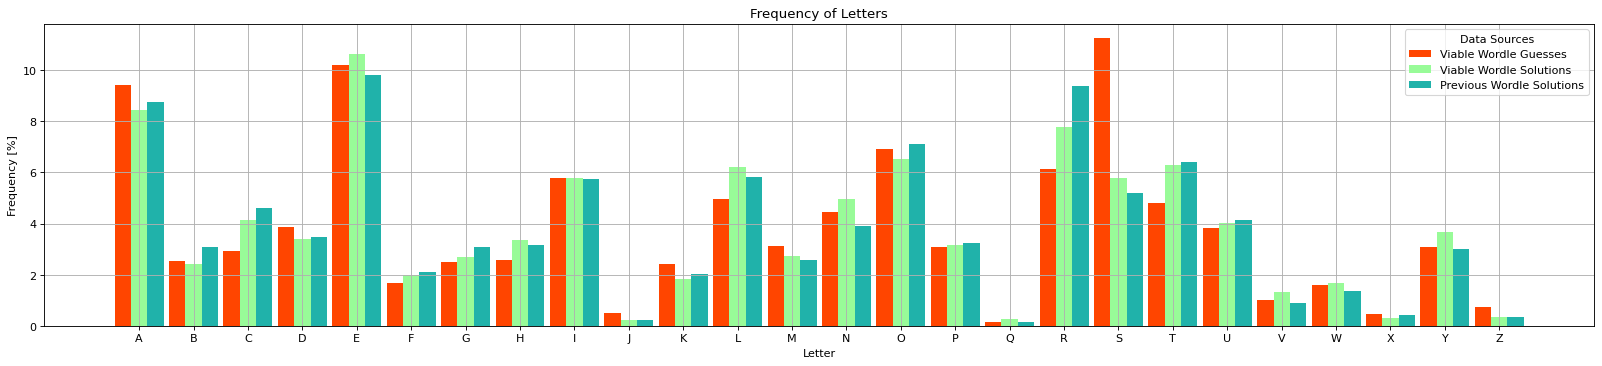

In [36]:
plt.figure(figsize=(25,5), dpi=80)
wd = 0.3
X_letter = np.arange(len(dframe_vg_frequency))

# green + blue
plt.bar(X_letter-wd, dframe_vg_frequency[6], width=wd, color = '#FF4500')

#plt.bar(X_letter-wd, dframe_vg_frequency[6], width=wd)

# blue
plt.bar(X_letter, dframe_vs_frequency[6], width=wd, color = '#98FB98')

# yellow
plt.bar(X_letter+wd, dframe_pw_frequency[6], width=wd, color = '#20B2AA')

plt.xticks(X_letter, dframe_vg_frequency['index'])
plt.title('Frequency of Letters')
plt.xlabel('Letter')
plt.ylabel('Frequency [%]')
plt.legend(['Viable Wordle Guesses', 'Viable Wordle Solutions', 'Previous Wordle Solutions'], title='Data Sources')
plt.grid()
plt.show()


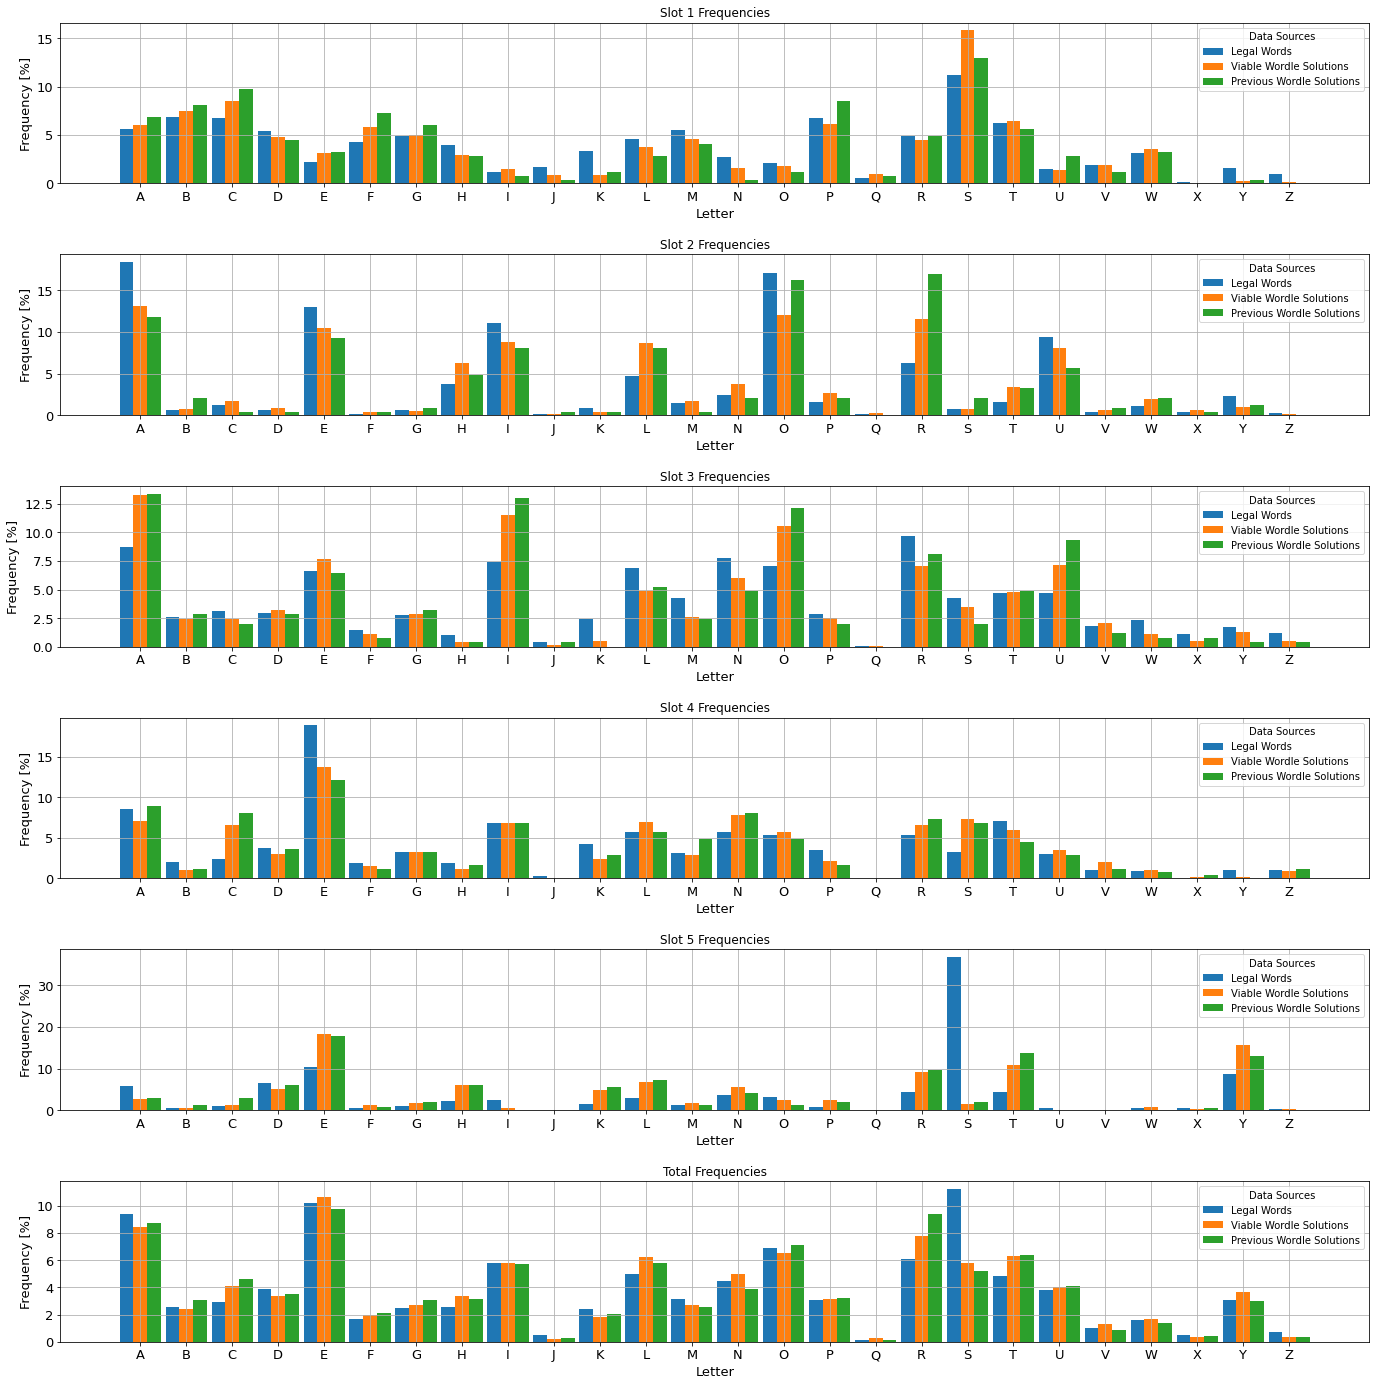

In [18]:
fig, ax = plt.subplots(6,1)
fig.set_figheight(20)
fig.set_figwidth(20)
fig.tight_layout(pad=5)

wd = 0.3
X_letter = np.arange(len(dframe_vg_frequency))

titles = ['Slot 1 Frequencies','Slot 2 Frequencies','Slot 3 Frequencies','Slot 4 Frequencies','Slot 5 Frequencies','Total Frequencies']

for i in range(0,6):
    ax[i].bar(X_letter-wd, dframe_vg_frequency[i+1], width=wd)
    ax[i].bar(X_letter, dframe_vs_frequency[i+1], width=wd)
    ax[i].bar(X_letter+wd, dframe_pw_frequency[i+1], width=wd)
    ax[i].set_xticks(X_letter, dframe_vg_frequency['index'])
    ax[i].set_xlabel('Letter',fontsize=13)
    ax[i].set_ylabel('Frequency [%]',fontsize=13)
    ax[i].tick_params(labelsize=13)
    ax[i].grid()
    ax[i].legend(['Legal Words', 'Viable Wordle Solutions', 'Previous Wordle Solutions'], title='Data Sources')
    ax[i].set_title(titles[i])
